# __0. Imports__

In [1]:
from secret_key import Secret
import pandas as pd
import requests
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM



2024-03-17 14:07:20.165546: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-17 14:07:20.168468: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-17 14:07:20.204355: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-17 14:07:20.857728: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<h1>
    <b>1. Requesting the data</b>
</h1>
<h4><i> Here I explain the 'parameters' that the <b>api url</b> requires</i></h4>
<h2>
    <b>1.1 API Parameters</b>
</h2>
<ul>
    <li>
        <strong> Ticker</strong>
        <ul>
            <li><u>JSON FIELD:</u>
            </li>
            <li><u>DATA TYPE:</u> string
            </li>
            <li><u>REQUIRED:</u>
            </li>
        </ul>
    </li>
    <li> 
        <strong>Start Date</strong>
        <ul>
            <li><u>JSON FIELD:</u>
            </li>
            <li>DATA TYPE: date (YYYY-MM-DD)
            </li>
            <li>REQUIRED:
            </li>
        </ul>
    </li>
    <li>
        <strong>End Date</strong>
        <ul>
            <li>JSON FIELD:
            </li>
            <li>DATA TYPE:date (YYYY-MM-DD)
            </li>
            <li>REQUIRED:
            </li>
        </ul>
    </li>
    <li>
        <strong> Resample Freq</strong>
        <ul>
            <li>JSON FIELD:
            </li>
            <li>DATA TYPE: string (e.g. "15min" or "4hour". )
            </li>
            <li>REQUIRED:
            </li>
            <li>DEFAULT:5min
            </li>
        </ul>
    </li>
    <li>
        <strong>Response Format</strong>
        <ul>
            <li>JSON FIELD:
            </li>
            <li>DATA TYPE: string
            </li>
            <li>REQUIRED:
            </li>
            <li>DEFAULT: JSON
            </li>
        </ul>
    </li>
</ul>


In [2]:
headers =  {
    'Content-Type' : 'application/json'
}

In [3]:
ticker = 'EURUSD'
start_date = '2024-03-01'

In [4]:
requestResponse = requests.get(f"https://api.tiingo.com/tiingo/fx/{ticker.lower()}/prices?startDate={start_date}&resampleFreq=5min&token=ebed6535a2acbe1a06b0057e8d1e8af61e5cefa7", headers=headers)

In [5]:
data = requestResponse.json() 
data 

[{'date': '2024-03-01T00:00:00.000Z',
  'ticker': 'eurusd',
  'open': 1.080585,
  'high': 1.080765,
  'low': 1.080545,
  'close': 1.080625},
 {'date': '2024-03-01T00:05:00.000Z',
  'ticker': 'eurusd',
  'open': 1.080615,
  'high': 1.080835,
  'low': 1.080545,
  'close': 1.08081},
 {'date': '2024-03-01T00:10:00.000Z',
  'ticker': 'eurusd',
  'open': 1.08082,
  'high': 1.08089,
  'low': 1.08082,
  'close': 1.080885},
 {'date': '2024-03-01T00:15:00.000Z',
  'ticker': 'eurusd',
  'open': 1.08088,
  'high': 1.080945,
  'low': 1.08081,
  'close': 1.08088},
 {'date': '2024-03-01T00:20:00.000Z',
  'ticker': 'eurusd',
  'open': 1.080885,
  'high': 1.080935,
  'low': 1.080865,
  'close': 1.08088},
 {'date': '2024-03-01T00:25:00.000Z',
  'ticker': 'eurusd',
  'open': 1.080875,
  'high': 1.080905,
  'low': 1.080775,
  'close': 1.080775},
 {'date': '2024-03-01T00:30:00.000Z',
  'ticker': 'eurusd',
  'open': 1.08078,
  'high': 1.08082,
  'low': 1.080775,
  'close': 1.080785},
 {'date': '2024-03-01T0

# __2. Analysis & Processing__

<h2><strong>2.1 Basic Analysis</strong></h2>

In [6]:
df= pd.DataFrame(data)
df.shape

(3134, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3134 non-null   object 
 1   ticker  3134 non-null   object 
 2   open    3134 non-null   float64
 3   high    3134 non-null   float64
 4   low     3134 non-null   float64
 5   close   3134 non-null   float64
dtypes: float64(4), object(2)
memory usage: 147.0+ KB


In [8]:
df.sample(5)

,date,ticker,open,high,low,close
1041,2024-03-06T15:00:00.000Z,eurusd,1.088640,1.088895,1.088145,1.088205
962,2024-03-06T08:25:00.000Z,eurusd,1.086770,1.086835,1.086555,1.086625
523,2024-03-04T19:40:00.000Z,eurusd,1.085810,1.085810,1.085685,1.085745
1134,2024-03-06T22:50:00.000Z,eurusd,1.089860,1.089900,1.089825,1.089860
586,2024-03-05T01:00:00.000Z,eurusd,1.085285,1.085345,1.085205,1.085255


In [9]:
df.columns

Index(['date', 'ticker', 'open', 'high', 'low', 'close'], dtype='object')

In [10]:
type(df['date'])


pandas.core.series.Series

In [11]:
df['date'] = pd.to_datetime(df['date'])


In [12]:
df.set_index('date', inplace=True)


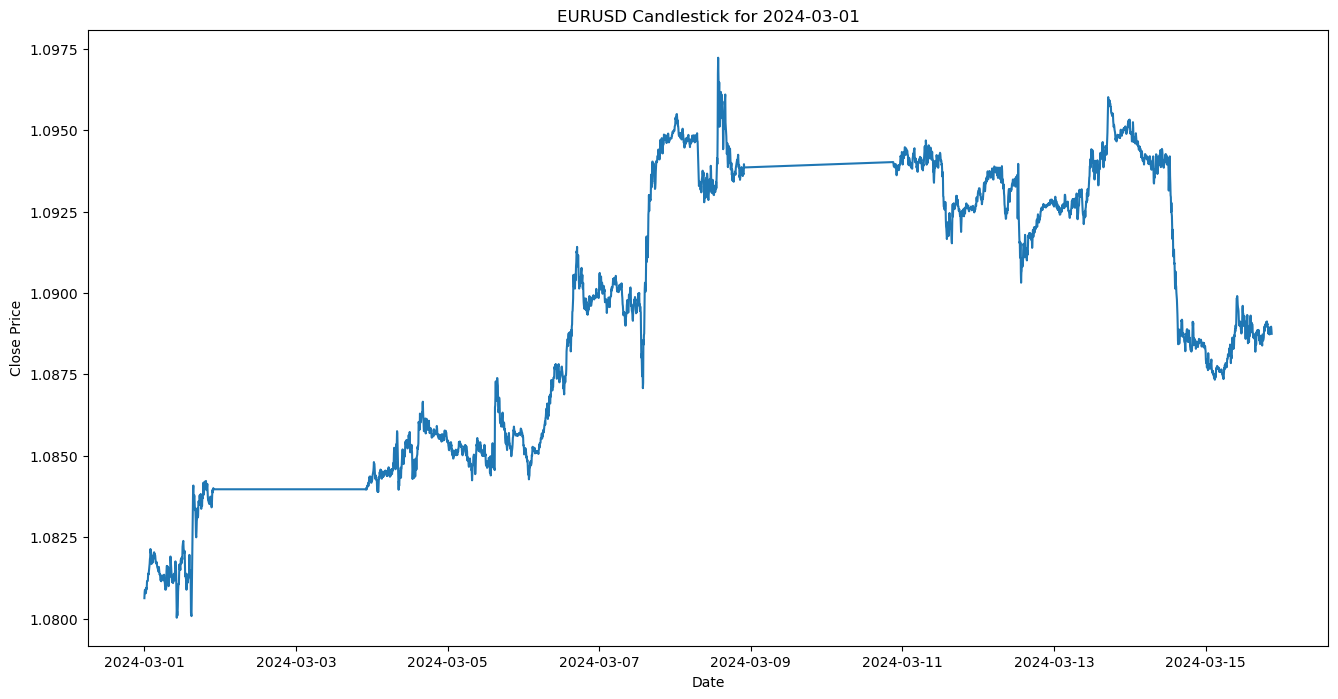

In [13]:
plt.figure(figsize=(16,8))
plt.title(f'{ticker} Candlestick for {start_date}')
plt.plot(df['close'])
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()

<h2><strong>2.2 Preprocessing</strong></h2>

In [14]:
scaler = StandardScaler()
numerical_features = ['open', 'high', 'low', 'close']  # Assuming these are your numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [19]:
# df_close = df['close']
# df_close
df.head()

,ticker,open,high,low,close
date,,,,,
2024-03-01 00:00:00+00:00,eurusd,-2.174457,-2.159505,-2.157275,-2.167059
2024-03-01 00:05:00+00:00,eurusd,-2.167283,-2.142767,-2.157275,-2.122785
2024-03-01 00:10:00+00:00,eurusd,-2.118258,-2.129616,-2.091472,-2.104836
2024-03-01 00:15:00+00:00,eurusd,-2.103910,-2.116465,-2.093865,-2.106033
2024-03-01 00:20:00+00:00,eurusd,-2.102714,-2.118856,-2.080704,-2.106033


In [20]:
def create_lagged_dataframe(df, lag_steps=3):
    lagged_df = pd.DataFrame(index=df.index)
    lagged_df['DateTime'] = df.index
    lagged_df['ActualValue'] = df['close']

    # Create lagged columns for previous values
    for i in range(1, lag_steps + 1):
        lagged_df[f'PrevValue_{i}'] = df['close'].shift(i)

    return lagged_df.dropna()

# Assuming df is your original DataFrame containing the time series data
lagged_df = create_lagged_dataframe(df)
lagged_df.head()


,DateTime,ActualValue,PrevValue_1,PrevValue_2,PrevValue_3
date,,,,,
2024-03-01 00:15:00+00:00,2024-03-01 00:15:00+00:00,-2.106033,-2.104836,-2.122785,-2.167059
2024-03-01 00:20:00+00:00,2024-03-01 00:20:00+00:00,-2.106033,-2.106033,-2.104836,-2.122785
2024-03-01 00:25:00+00:00,2024-03-01 00:25:00+00:00,-2.131161,-2.106033,-2.106033,-2.104836
2024-03-01 00:30:00+00:00,2024-03-01 00:30:00+00:00,-2.128768,-2.131161,-2.106033,-2.106033
2024-03-01 00:35:00+00:00,2024-03-01 00:35:00+00:00,-2.090477,-2.128768,-2.131161,-2.106033


In [17]:
# X = df.drop('target_column', axis=1)  # Features
# y = df['target_column']  # Target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
